# EDA - STUDENT PREDICTION

To Analyse the performance of students based on the given variables and show the visualisations.

## Loading the modules and dataset

In [1]:
# Importing the necessary modules required
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib import rcParams 
# rcParam -defines a runtime configuration (rc) containing the default styles for every plot element you create

In [3]:
# Loading the dataset
data = pd.read_csv("D:\JUPYTER NOTEBOOKS\PROJECT 1 - STUDENT PREDICTION EDA\StudentsPerformance.csv")

## Checking the data

In [9]:
# Printing the top 5 rows of the dataset to understand much better
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
# To know the number of rows and columns in the dataset
data.shape

(1000, 8)

In [17]:
# It gives the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


## Descriptive analysis

In [18]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Checking for missing values

In [20]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There is no missing data present in our dataset

In [26]:
# Adding a column for the total marks
data["total marks"]=data["math score"]+data["reading score"]+data["writing score"]

## Feature classification

As we can see that there are 4 columns which are numerical (continuous variables) - math score, reading score, writing score, total marks.The rest of them are the categorical variables.
It is good to practice the categorical and numerical variables.

In [27]:
data_numerical = data[["math score","reading score","writing score","total marks"]]
data_categorical = data[["gender","race/ethnicity","parental level of education","lunch","test preparation course"]]

We use the histogram to see how the numerical variables are distributed

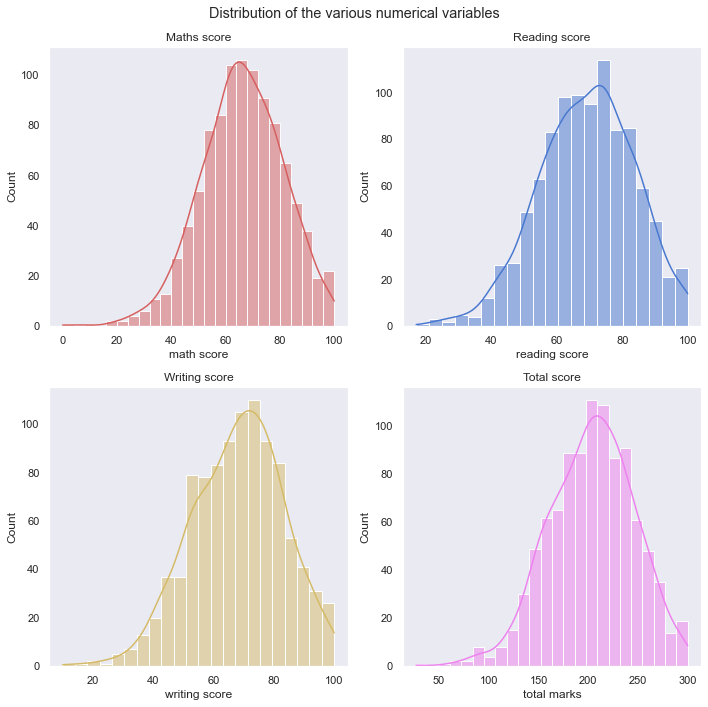

In [79]:
sns.set(style="dark", palette="muted", color_codes=True)
fig,axes =  plt.subplots(2,2,figsize=(10,10)) 
fig.suptitle("Distribution of the various numerical variables")

# Maths score distribution
ax=sns.histplot(data["math score"],kde=True,color='r',ax=axes[0,0])
axes[0,0].set_title("Maths score")

# Reading score distribution
sns.histplot(data["reading score"],ax=axes[0,1],kde=True,color='b')
axes[0,1].set_title("Reading score")

# Writing score distribution
sns.histplot(data["writing score"],ax=axes[1,0],kde=True,color='y')
axes[1,0].set_title("Writing score")

# Total marks distribution
sns.histplot(data["total marks"],ax=axes[1,1],kde=True,color='violet')
axes[1,1].set_title("Total score")

plt.tight_layout()
plt.savefig("Distribution of the various numerical variables.png") 

#### We see that our numerical data shows a bell curve and it follows normal distribution

## KDE plot

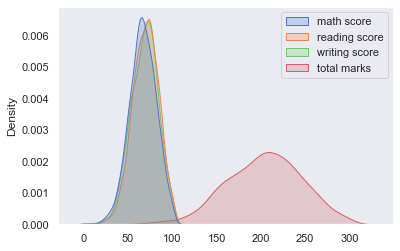

In [81]:
sns.kdeplot(data=data_numerical,shade=True,palette="muted")
plt.savefig("KDE plot.png")

In [77]:
data_numerical.columns

Index(['math score', 'reading score', 'writing score', 'total marks'], dtype='object')

In [78]:
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,math score,-0.278935,0.274964
1,reading score,-0.259105,-0.068265
2,writing score,-0.289444,-0.033365
3,total marks,-0.299057,0.125843


If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

# Analyzing Students performance

## Measure the impact of test preparation course completion on students score

In [14]:
feature=['math score', 'reading score','writing score', 'total marks']

In [15]:
list(enumerate(feature))

[(0, 'math score'),
 (1, 'reading score'),
 (2, 'writing score'),
 (3, 'total marks')]

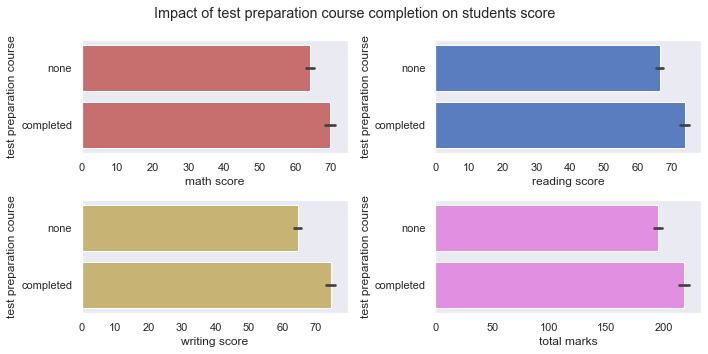

In [96]:
sns.set(style="dark", palette="muted", color_codes=True)
fig,axes =  plt.subplots(2,2,figsize=(10,5)) 
fig.suptitle("Impact of test preparation course completion on students score")

# Maths score distribution
sns.barplot(x=data["math score"],y=data["test preparation course"],color='r',ax=axes[0,0])

# Reading score distribution
sns.barplot(x=data["reading score"],y=data["test preparation course"],ax=axes[0,1],color='b')

# Writing score distribution
sns.barplot(x=data["writing score"],y=data["test preparation course"],ax=axes[1,0],color='y')

# Total marks distribution
sns.barplot(data["total marks"],y=data["test preparation course"],ax=axes[1,1],color='violet')

plt.tight_layout()
plt.savefig("impact of test preparation course completion on students score.png") 

#### Students who have completed the test preparation course have scored more than those who have not completed the course.This indicates that test score completion affectes positively on the students score

## Measure the impact of lunch on the students score

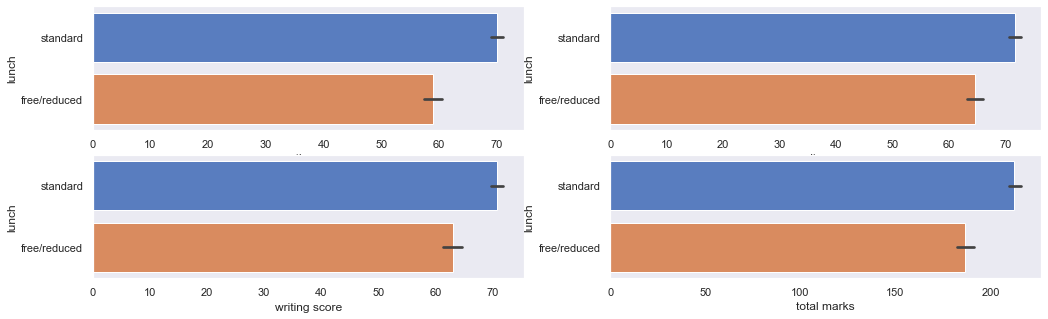

In [102]:
plt.figure(figsize=(17,5))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.barplot(i[1],y="lunch",data=data)
plt.savefig("impact of lunch on the students score.png")

#### Students who are following the standard lunch process have scored more marks compared to the marks of students who are following free/reduced lunch process. This shows that standard luch process affects positively on students score

## Scatterplots for the numerical variables

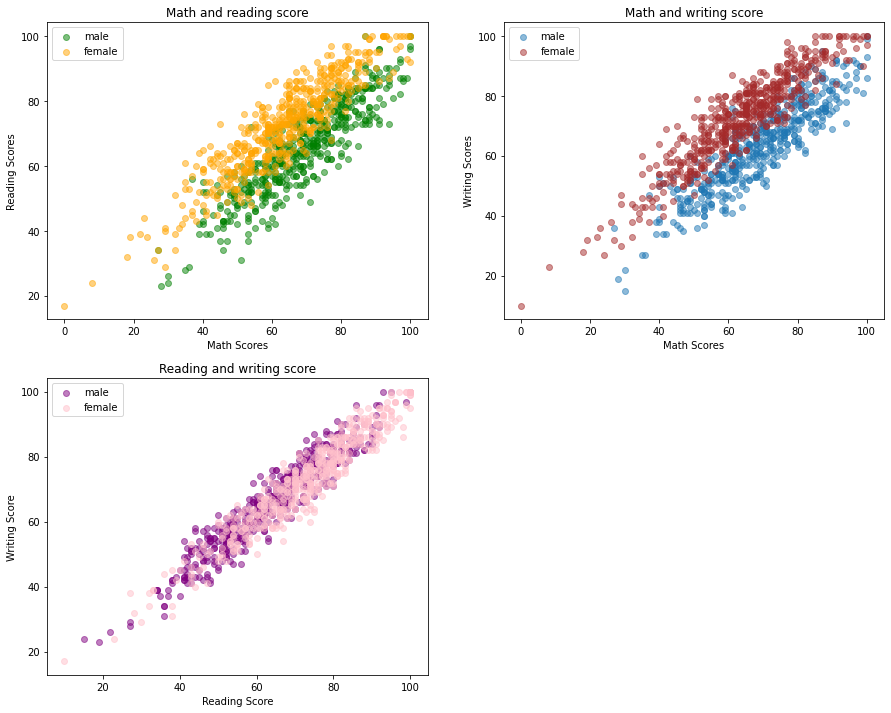

In [10]:
fig,ax = plt.subplots(2,2,figsize=(15,12))

#Math and reading scores
ax[0,0].scatter(x='math score',y='reading score',data=data[data['gender']=='male'],alpha=0.5,label='male',color='green')
ax[0,0].scatter(x='math score',y='reading score',data=data[data['gender']=='female'],alpha=0.5,label='female',color='orange')
ax[0,0].set_xlabel('Math Scores')
ax[0,0].set_ylabel('Reading Scores')
ax[0,0].set_title('Math and reading score')
ax[0,0].legend()

# Mathematics and Writing Scores
ax[0,1].scatter(x='math score',y='writing score',data=data[data['gender']=='male'],alpha=0.5,label='male')
ax[0,1].scatter(x='math score',y='writing score',data=data[data['gender']=='female'],alpha=0.5,label='female',color='brown')
ax[0,1].set_xlabel('Math Scores')
ax[0,1].set_ylabel('Writing Scores')
ax[0,1].set_title('Math and writing score')
ax[0,1].legend()

# Reading and writing Scores
ax[1,0].scatter(x='writing score',y='reading score',data=data[data['gender']=='male'],alpha=0.5,label='male',color='purple')
ax[1,0].scatter(x='writing score',y='reading score',data=data[data['gender']=='female'],alpha=0.5,label='female',color='pink')
ax[1,0].set_xlabel('Reading Score')
ax[1,0].set_ylabel('Writing Score')
ax[1,0].set_title('Reading and writing score')
ax[1,0].legend()
ax[1,1].set_visible(False) #makes the last subplot invisible

plt.savefig("Scatterplots for the numerical variables.png")

#### We can see from the above figure that :
#### 1. Most of the scores fall between 40-100 range.
#### 2.Only a small portion of students scored less than 40.
#### 3.The scores increases linearly with each other.

## Number of people in different groups

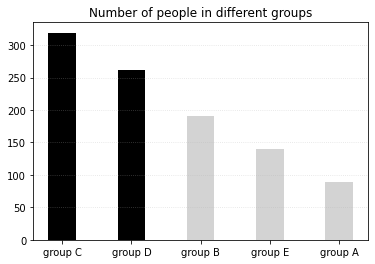

In [23]:
color_map = ['lightgrey' for _ in range(5)]
color_map[0] =color_map[1]='black'

data_group = data['race/ethnicity'].value_counts().sort_values(ascending=False)
plt.bar(data_group.index, data_group , width=0.4, color=color_map)
plt.grid(linestyle=':',axis='y',alpha=0.4)
plt.title("Number of people in different groups")
plt.savefig("Number of people in different groups.png")

#### Group C has the most number of people and Group A has the least amount of people.

# Categorical scatterplots

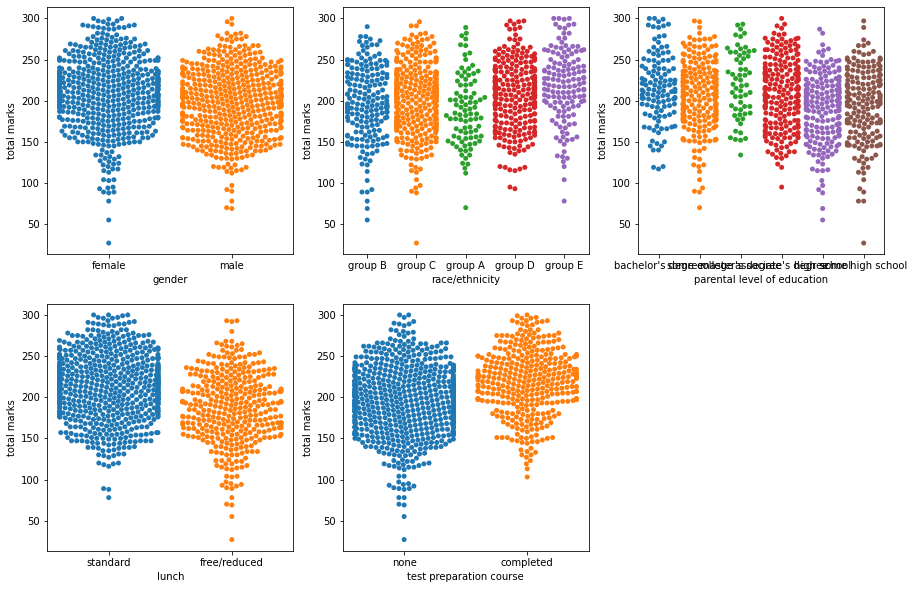

In [30]:
plt.figure(figsize=(15,10))
for indx,val in enumerate(data_categorical.columns):
    plt.subplot(2,3,indx+1)
    sns.swarmplot(x=data_categorical[val],y=data_numerical['total marks'])
plt.savefig("categorical scatterplot.png")

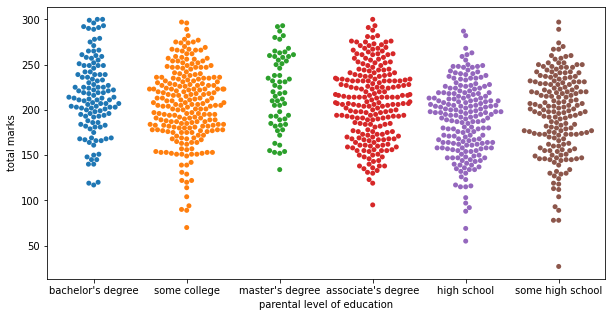

In [33]:
plt.figure(figsize=(10,5))
sns.swarmplot(x=data_categorical['parental level of education'],y=data_numerical['total marks'])
plt.savefig("parental level of education vs total marks")

#### We can observe from it that most of the students have scored above 150

## Education level of Parents

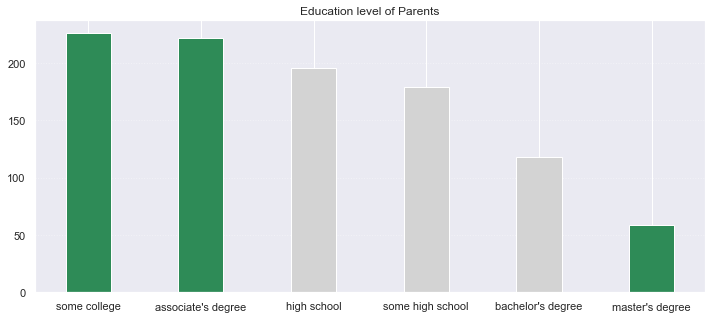

In [47]:
color_map = ['lightgrey' for _ in range(5)]
color_map[0] =color_map[1]='seagreen'
fig,ax = plt.subplots(1,1,figsize=(12,5))
data_group = data['parental level of education'].value_counts().sort_values(ascending=False)
ax.bar(data_group.index, data_group , width=0.4, color=color_map)
ax.grid(linestyle=':',axis='y',alpha=0.4)
plt.title("Education level of Parents")
plt.savefig("Education level of Parents.png")

#### Most of the parents attended some college and almost the same amount of people have an associate's degree. Parents who hold a master's degree are very few in number.

## Gender, lunch and test preparation

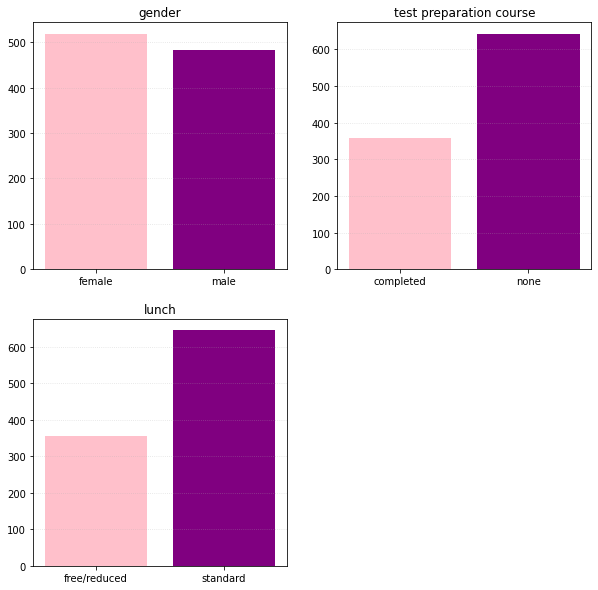

In [52]:
data1=data[['gender','lunch','test preparation course']]
fig,ax=plt.subplots(2,2,figsize=(10,10))
color_map = ['purple' for _ in range(2)]
color_map[0] ='pink' #color highlight
for i,idx in enumerate(data1.columns):
    z=data1[idx].value_counts().sort_index()
    ax[i%2][i//2].bar(z.index,z , color=color_map) 
    ax[i%2][i//2].set_title(idx)                   
    ax[i%2][i//2].grid(linestyle=':',axis='y',alpha=0.4) 
    
ax[1][1].set_visible(False)
plt.savefig("Gender , Lunch and Test preparation.png")

#### We can observe from the above figures that:

#### 1. Females students are more than male students.
#### 2. The students who have completed any course are less than the students who did not prepare.
#### 3. Students who prefer standard lunch are more in number than students who prefer free/reduced lunch.

## How does gender effect the students performance individually

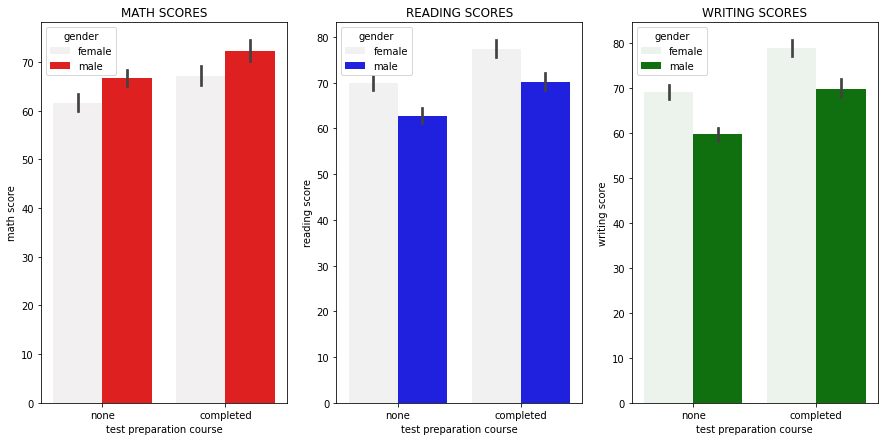

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=data,hue='gender',color='r')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=data,hue='gender',color='b')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=data,hue='gender',color='g')
plt.title('WRITING SCORES')
plt.show()
plt.savefig("How does gender effect the students performance individually.png")

In [49]:
# Number of students who passed in math
data['maths_passed']= data['math score'].apply(lambda x : 'P' if x>40 else 'F')
data['maths_passed'].value_counts()

P    950
F     50
Name: maths_passed, dtype: int64

In [50]:
# Number of students who passed in reading
data['reading_passed'] = data['reading score'].apply(lambda x: 'P' if x>40 else 'F')
data['reading_passed'].value_counts()

P    973
F     27
Name: reading_passed, dtype: int64

In [51]:
# Number of students who passed in writing.
data['writing_passed']=data['writing score'].apply(lambda x: 'P' if x>40 else 'F')
data['writing_passed'].value_counts()

P    965
F     35
Name: writing_passed, dtype: int64

## Which subject has the most number of failures?

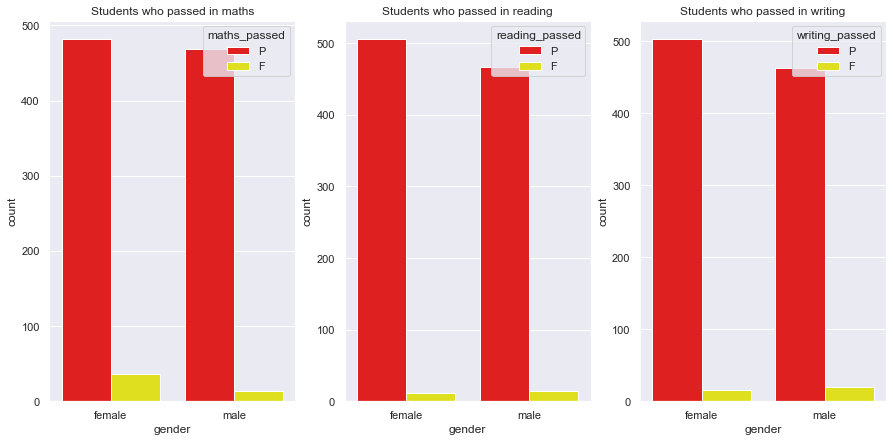

In [74]:
plt.subplots(1,3,figsize=(15,7))
color_map = ['yellow' for _ in range(6)]
color_map[0] ='red' #color highlight
plt.subplot(1,3,1)
sns.countplot(x='gender',data=data,hue='maths_passed',palette=color_map)
plt.title('Students who passed in maths')
plt.subplot(1,3,2)
sns.countplot(x='gender',data=data,hue='reading_passed',palette=color_map)
plt.title('Students who passed in reading')
plt.subplot(1,3,3)
sns.countplot(x='gender',data=data,hue='writing_passed',palette=color_map)
plt.title('Students who passed in writing')
plt.savefig("Which subject has the most number of failures.png")

#### The number of people who failed in mathematics are more than other subjects.Overall the number of students who failed are significantly less than the students who passed.

## Jointplots

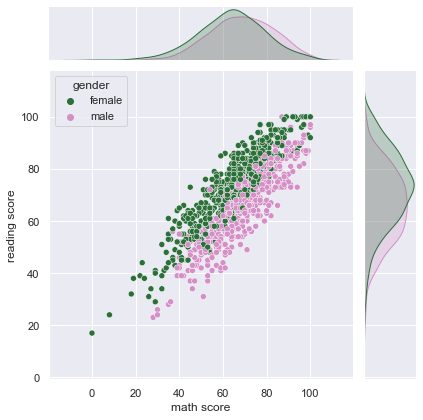

In [64]:
sns.jointplot(x='math score',y='reading score',data=data,hue='gender',palette='cubehelix')
sns.set_theme(style="darkgrid")
plt.savefig("Jointplot1.png")

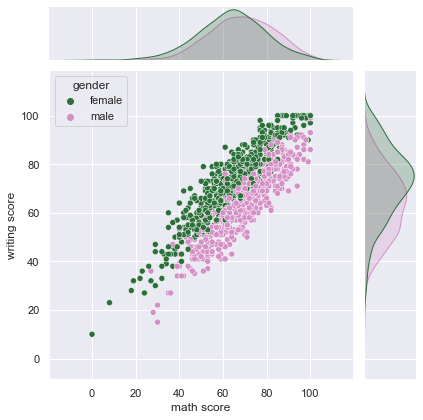

In [65]:
sns.jointplot(x='math score',y='writing score',data=data,hue='gender',palette='cubehelix')
plt.savefig("Jointplot2.png")

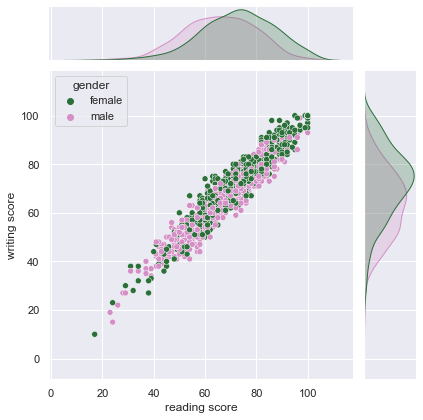

In [66]:
sns.jointplot(x='reading score',y='writing score',data=data,hue='gender',palette='cubehelix')
plt.savefig("Jointplot3.png")

#### When it comes to correlation btw males and females of reading and writing it is very closely correlated

## Relplot

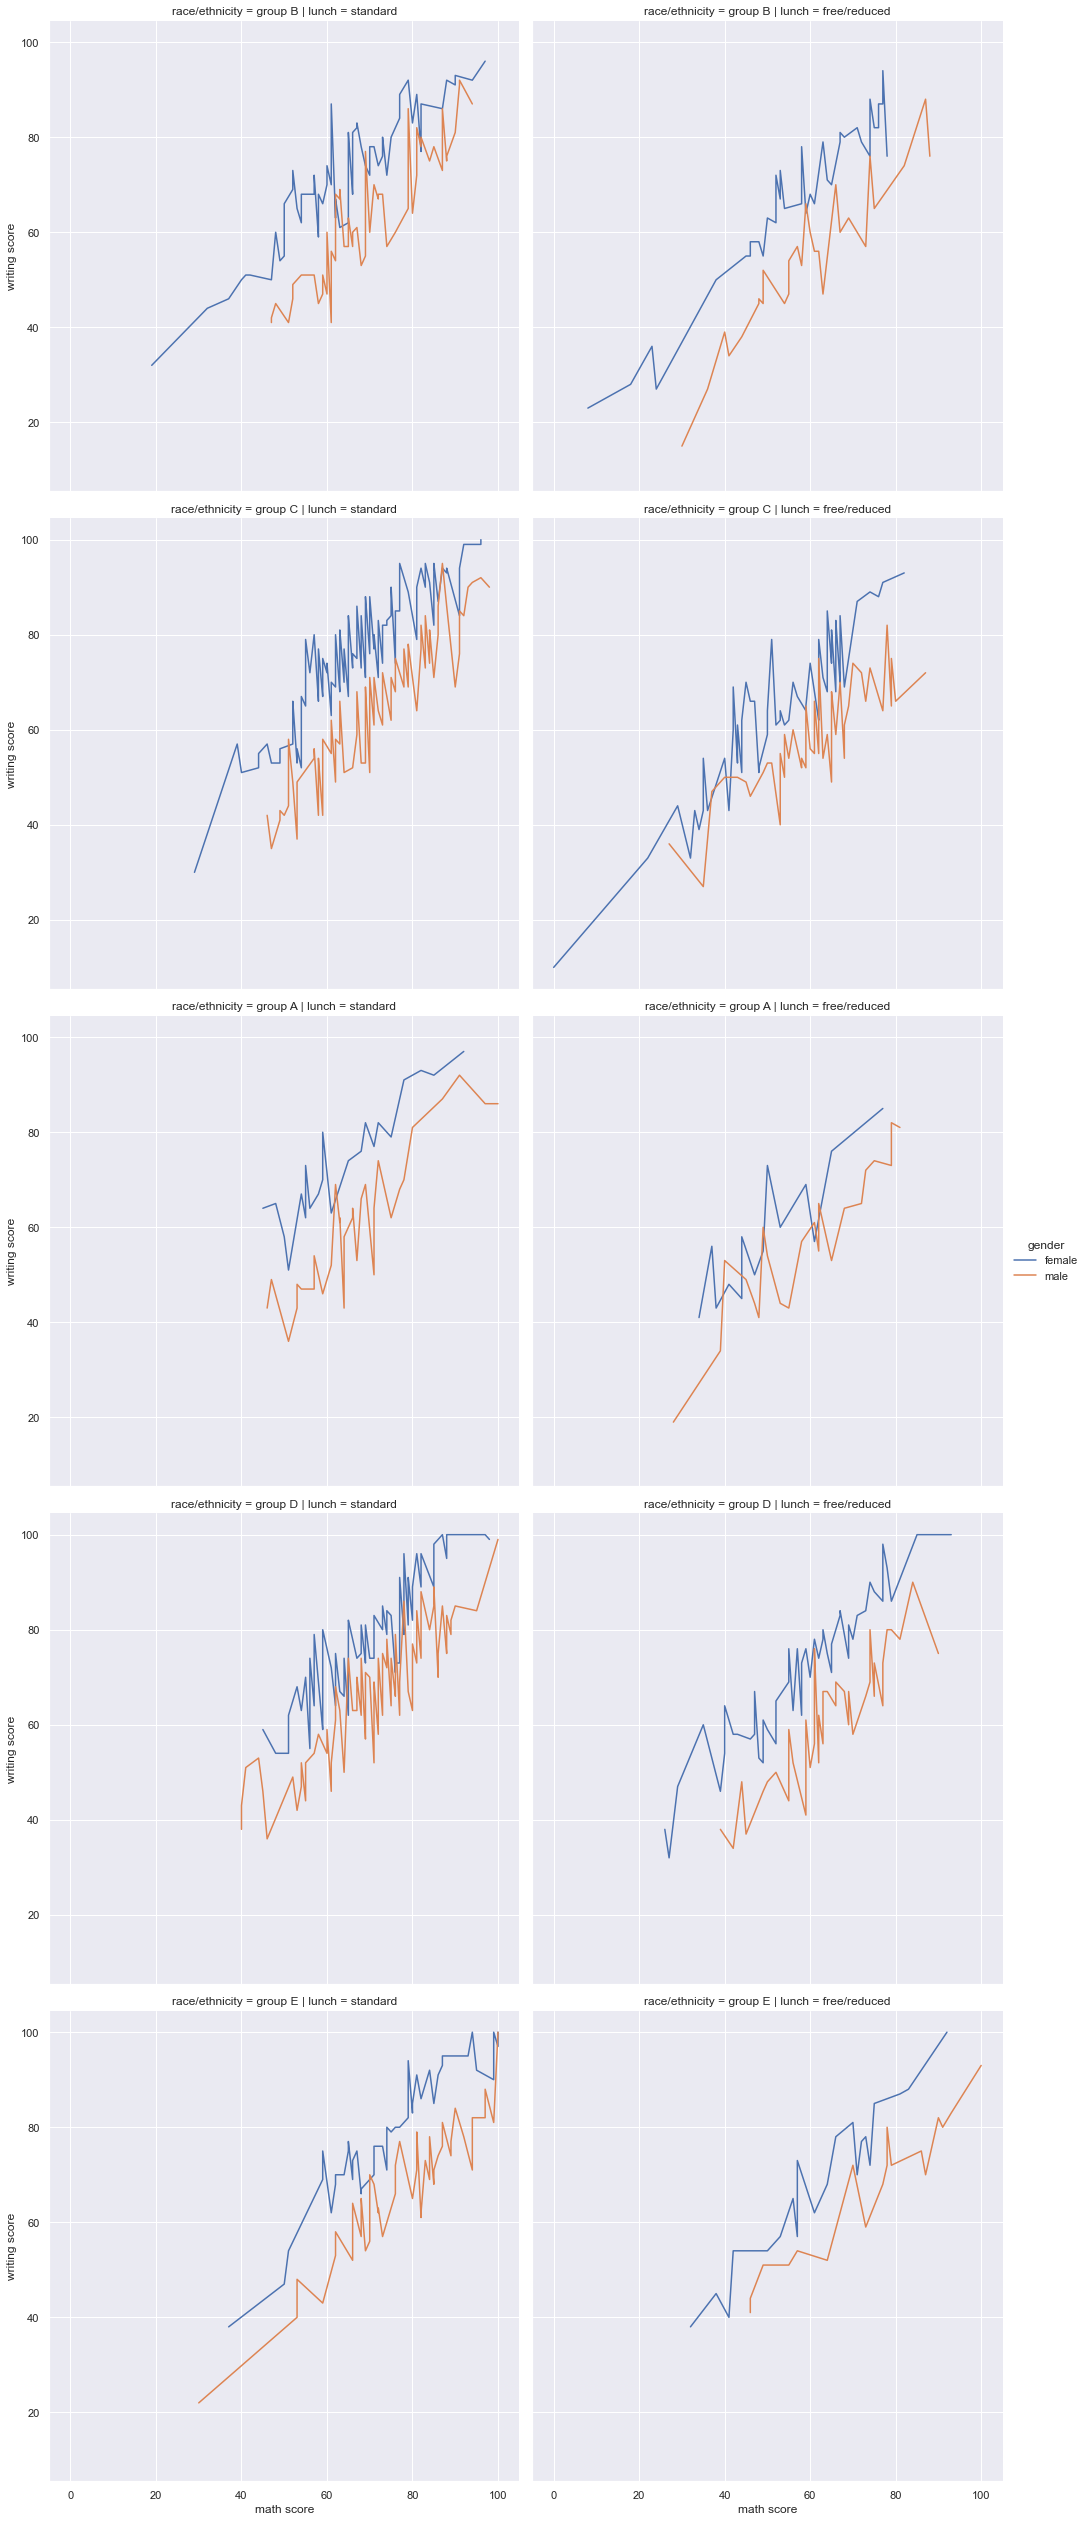

In [67]:
sns.relplot(x="math score", y="writing score", hue="gender",
            col="lunch", row="race/ethnicity", height=7,
            kind="line", estimator=None, data=data, legend="full");
plt.savefig("relplot.png")

## Relationship analysis

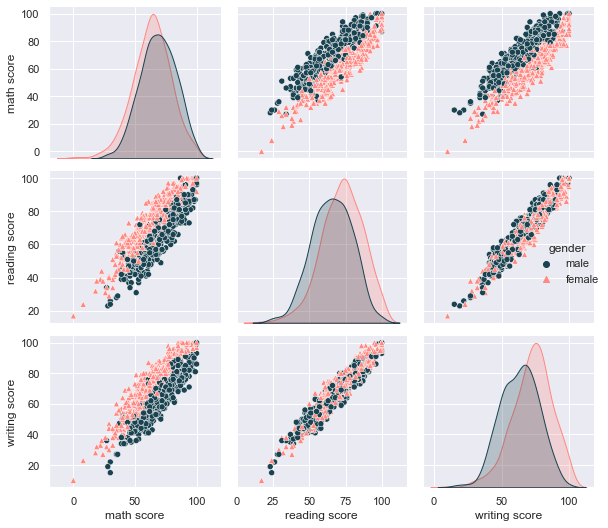

<Figure size 432x288 with 0 Axes>

In [76]:
sns.pairplot(x_vars = ['math score', 'reading score', 'writing score'],
             y_vars = ['math score', 'reading score', 'writing score'], hue = 'gender',
             hue_order = ['male', 'female'], markers = ['^', 'o'],
             data = data, palette = {'male': '#194350', 'female': '#ff8882'})
plt.tight_layout()
plt.show()
plt.savefig("pairplot.png")

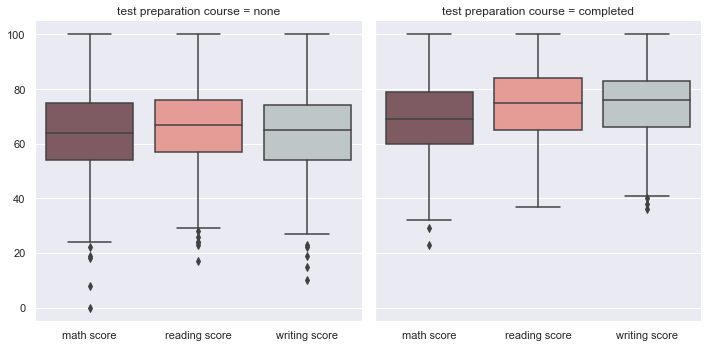

<Figure size 432x288 with 0 Axes>

In [79]:
sns.catplot(data = data, kind = 'box', col = 'test preparation course', 
            palette = {'math score': '#845460', 'reading score': '#f39189', 'writing score': '#bdc7c9'})
plt.tight_layout()
plt.show()
plt.savefig("ctt.png")

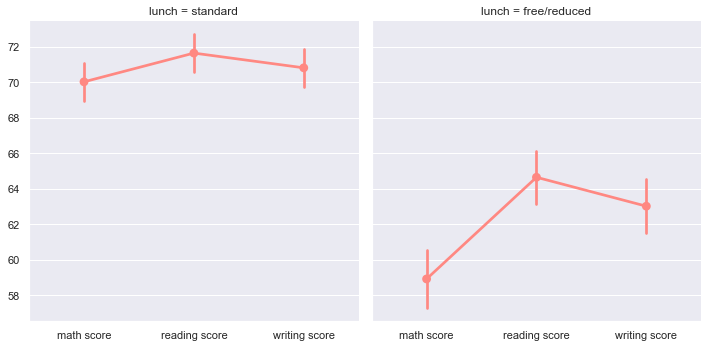

<Figure size 432x288 with 0 Axes>

In [78]:
sns.catplot(kind = 'point', data = data, col = 'lunch', color = '#ff8882')
plt.tight_layout()
plt.show()
plt.savefig("cp.png")

## Visualisation graph

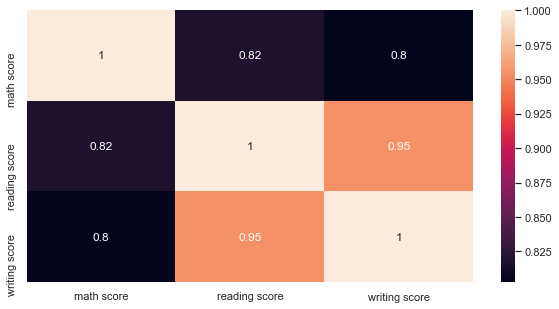

In [75]:
plt.figure(figsize=(10,5))
ax=sns.heatmap(data.corr(),annot=True)
plt.savefig("visualisation graph.png")

### Thanks for reading through my EDA.